<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week1/ML_1_4_Logistic_Regression_in_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pbpython.com/categorical-encoding.html

https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,predictions%20from%20a%20classification%20algorithm.&text=The%20report%20shows%20the%20main,positives%2C%20true%20and%20false%20negatives.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use ('seaborn')

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
%cd /content/drive/MyDrive/SciSchool/week1

/content/drive/MyDrive/SciSchool/week1


In [ ]:
!kaggle datasets download -d lodetomasi1995/income-classification -p data

  0% 0.00/459k [00:00<?, ?B/s]
100% 459k/459k [00:00<00:00, 13.1MB/s]


In [ ]:
!unzip data/income-classification.zip -d data

Archive:  data/income-classification.zip
  inflating: data/income_evaluation.csv  


In [ ]:
data= pd.read_csv ('data/income_evaluation.csv')
data.head (5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
for i,c in enumerate(data.columns):
    # print (c.split ()[0])
    data.rename (columns={c:c.split()[0]}, inplace=True)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
cols= ['age', 'education', 'marital-status', 'race', 'sex', 'hours-per-week', 'native-country', 'income']
df= data[cols]

In [ ]:
df.head ()

,age,education,marital-status,race,sex,hours-per-week,native-country,income
0,39,Bachelors,Never-married,White,Male,40,United-States,<=50K
1,50,Bachelors,Married-civ-spouse,White,Male,13,United-States,<=50K
2,38,HS-grad,Divorced,White,Male,40,United-States,<=50K
3,53,11th,Married-civ-spouse,Black,Male,40,United-States,<=50K
4,28,Bachelors,Married-civ-spouse,Black,Female,40,Cuba,<=50K


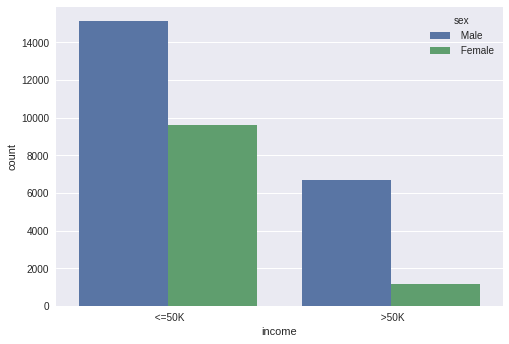

In [ ]:
sns.countplot (x= 'income', hue='sex', data= df)

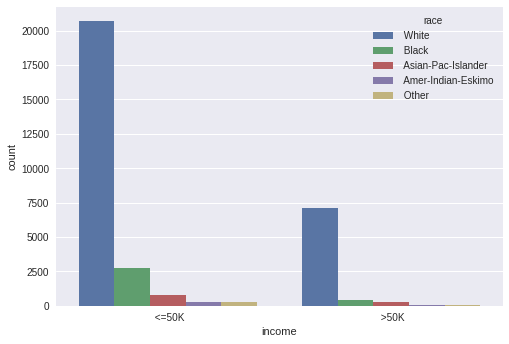

In [ ]:
sns.countplot (x= 'income', hue='race', data= df)

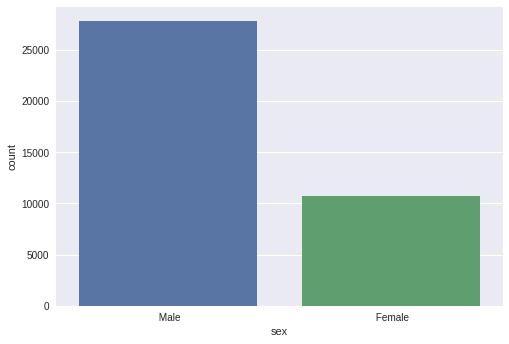

In [ ]:
sns.countplot(x="sex", data=df,)

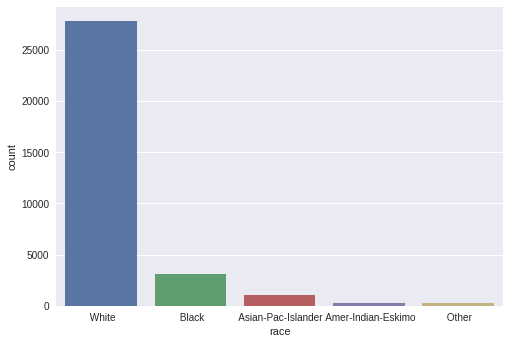

In [ ]:
sns.countplot(x="race", data=df,)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
cols_obj= ['education', 'marital-status', 'race', 'native-country']
ord_enc = OrdinalEncoder()
df[cols_obj] = ord_enc.fit_transform(df[cols_obj])
df.head ()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,education,marital-status,race,sex,hours-per-week,native-country,income
0,39,9.0,4.0,4.0,Male,40,39.0,<=50K
1,50,9.0,2.0,4.0,Male,13,39.0,<=50K
2,38,11.0,0.0,4.0,Male,40,39.0,<=50K
3,53,1.0,2.0,2.0,Male,40,39.0,<=50K
4,28,9.0,2.0,2.0,Female,40,5.0,<=50K


In [ ]:
df.race.unique ()

array([4., 2., 1., 0., 3.])

In [ ]:
data.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
df= pd.get_dummies (df, drop_first=True, dtype=int)
df.head ()

,age,education,marital-status,race,hours-per-week,native-country,sex_ Male,income_ >50K
0,39,9.0,4.0,4.0,40,39.0,1,0
1,50,9.0,2.0,4.0,13,39.0,1,0
2,38,11.0,0.0,4.0,40,39.0,1,0
3,53,1.0,2.0,2.0,40,39.0,1,0
4,28,9.0,2.0,2.0,40,5.0,0,0


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   education       32561 non-null  float64
 2   marital-status  32561 non-null  float64
 3   race            32561 non-null  float64
 4   hours-per-week  32561 non-null  int64  
 5   native-country  32561 non-null  float64
 6   sex_ Male       32561 non-null  int64  
 7   income_ >50K    32561 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.0 MB


In [ ]:
df.columns 

Index(['age', 'education', 'marital-status', 'race', 'hours-per-week',
       'native-country', 'sex_ Male', 'income_ >50K'],
      dtype='object')

In [ ]:
X= df[['age', 'education', 'marital-status', 'race', 'hours-per-week',
       'native-country', 'sex_ Male',]]

y= df['income_ >50K']

# Use Scikit Learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model= LogisticRegression ()
model.fit (X_train, y_train)

LogisticRegression()

In [ ]:
len (y_test)

10746

In [ ]:
predictions= model.predict (X_test)

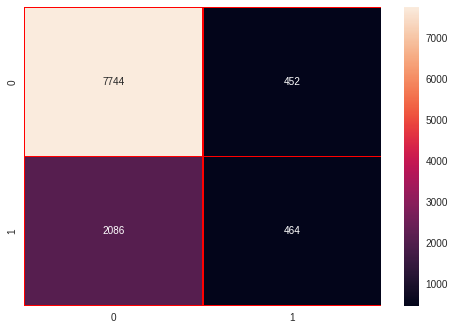

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test,predictions), annot=True,linewidths=0.5,linecolor="red",fmt = ".0f")

In [ ]:
auc_rec= metrics.classification_report(y_test,predictions, output_dict=True)
pd.DataFrame (auc_rec).transpose()

,precision,recall,f1-score,support
0,0.787792,0.944851,0.859203,8196.000000
1,0.506550,0.181961,0.267744,2550.000000
accuracy,0.763819,0.763819,0.763819,0.763819
macro avg,0.647171,0.563406,0.563474,10746.000000
weighted avg,0.721054,0.763819,0.718851,10746.000000
